The project involves using machine learning models to identify whether the students performs good in their final grade by predicting the CGPA and also evaluate different machine leaning on the student grade.

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


Steps to Follow for the Project: The dataset contains 43 features and 571 samples
Below are the steps to follow for the project:

1 :Importing required Libariries
2: Importing the Dataset 
3: Data Cleaning and transforming
4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship
5: Feature Selection/Extraction- to identify the most relevant features
6: Data Preprocessing
7: Predictive Modelling using various algorithms
8: Comparing the models and Model Evaluation
9: Project Outcomes & Conclusion

# Importing Required Dataset

In [99]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

# 2: Importing the Dataset downlaoded from kaggle

In [100]:
# Importing the dataset downloaded from kaggle
grade_data=pd.read_csv('Grades.csv')
grade_data.tail(20)  # displaying first 20 records from the dataset

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
551,CS-97552,A,B-,A,B+,A,A,B+,B+,A,...,B+,B-,A,C,B+,C,B-,C,B-,3.218
552,CS-97553,B-,C,A,B+,C-,A,B,C,B,...,C+,C,B+,F,D+,C-,B,D,D+,2.406
553,CS-97554,A,B,A+,C+,A,A,A-,A,B-,...,A-,B+,A,B+,A,C+,A-,B,A-,3.491
554,CS-97555,B+,C-,A+,C+,B,A-,B+,C,B+,...,A-,C+,A,B,B,B,B+,C-,B,2.880
555,CS-97556,B-,C,A,B-,C-,B,B,B-,C-,...,D,C-,B,C-,C+,B-,B+,D+,B-,2.206
556,CS-97557,A,B+,A+,A,A,B+,A-,B,A-,...,A,A-,A,B+,A,B,A,B+,A,3.624
557,CS-97558,B+,C+,B,A-,B-,B+,B+,C,B,...,C-,C,A-,C,C+,D+,B,C-,C,2.429
558,CS-97559,A-,B-,A,A,A-,A,B+,A-,B+,...,B+,B+,A,B,C,D,A-,D+,C,3.172
559,CS-97560,A-,C+,A,B,B,A-,C+,D,B,...,B+,B-,A,A-,A,C,B+,B+,A-,3.226
560,CS-97561,B+,C-,A,D+,C+,A-,C-,C+,C+,...,B+,C,B+,C-,C-,F,C,D,C-,2.370


In [101]:
grade_data['Seat No.']

0      CS-97001
1      CS-97002
2      CS-97003
3      CS-97004
4      CS-97005
         ...   
566    CS-97567
567    CS-97568
568    CS-97569
569    CS-97570
570    CS-97571
Name: Seat No., Length: 571, dtype: object

In [102]:
grade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

# 3: Data Cleaning and Transfroming

In [103]:
grade_data.shape

(571, 43)

In [104]:
grade_data.info() # to display all the information about respective features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

All the features are non mumerical apart from the CGPA

In [105]:
grade_data.columns.to_list()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [106]:
# Checking the Unique Values of Each Column using 5th to 10th  column as example
grade_data.apply(pd.Series.unique).values[5:15]

array([array(['C-', 'B-', 'B+', 'D', 'A', 'C+', 'A-', 'C', 'B', 'D+', nan, 'A+',
              'F', 'WU'], dtype=object)                                         ,
       array(['D+', 'C', 'A', 'A-', 'B', 'B-', 'B+', 'C+', 'C-', 'A+', 'D'],
             dtype=object)                                                  ,
       array(['D', 'B-', 'D+', 'A-', 'C+', 'A', 'C-', 'C', 'B', 'B+', nan, 'A+',
              'F', 'WU'], dtype=object)                                         ,
       array(['C-', 'A', 'B+', 'B', 'A-', 'B-', 'C', 'C+', 'D+', 'D', nan, 'A+',
              'WU', 'F'], dtype=object)                                         ,
       array(['B-', 'D+', 'A-', 'D', 'A', 'B+', 'B', 'C-', 'C+', 'C', 'WU', nan,
              'A+'], dtype=object)                                              ,
       array(['C-', 'D', 'A-', 'C+', 'B+', 'A', 'D+', 'C', 'B', 'B-', 'WU', nan,
              'F', 'A+'], dtype=object)                                         ,
       array(['C-', 'B+', 'B-'

In [107]:
grade_data=grade_data.drop('Seat No.', axis=1)


In [108]:
# Renaming HS-105/2 and HS-205 to have similar naming convention
grade_data.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [109]:
# Checking for missing values
grade_data.isnull().sum()


PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

In [110]:
# Droping the row if missing values is more than 25 or replacing the missing value by most common value if it is less than 25

grade_data = grade_data.drop(grade_data[grade_data.isnull().sum(axis=1) >= 25].index)

# Now the remaining null values are filled by 0
grade_data = grade_data.fillna(0)

In [111]:
grade_data.drop('Seat No.', axis=1)
#medical_data.drop('Age_range',axis=1)

KeyError: "['Seat No.'] not found in axis"

In [112]:
grade_data.isnull().sum() # Checking whether the missing values have been taken care of

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [113]:
# Checking the uniqueness of each features
grade_data.nunique()

PH-121     12
HS-101     11
CY-105     13
HS-105     12
MT-111     13
CS-105     11
CS-106     13
EL-102     12
EE-119     13
ME-107     12
CS-107     13
HS-205     13
MT-222     14
EE-222     14
MT-224     15
CS-210     15
CS-211     14
CS-203     13
CS-214     14
EE-217     14
CS-212     13
CS-215     15
MT-331     13
EF-303     13
HS-304     15
CS-301     13
CS-302     12
TC-383     13
MT-442     13
EL-332     14
CS-318     15
CS-306     14
CS-312     15
CS-317     13
CS-403     12
CS-421     14
CS-406     15
CS-414     14
CS-419     13
CS-423     13
CS-412     14
CGPA      486
dtype: int64

In [114]:
grade_data.nunique # displaying distinct values

<bound method DataFrame.nunique of     PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  \
0       B-     D+     C-      C     C-     D+      D     C-     B-     C-   
1        A      D     D+      D     B-      C      D      A     D+      D   
2        A      B      A     B-     B+      A     B-     B+     A-     A-   
3        D     C+     D+      D      D     A-     D+     C-      D     C+   
4       A-     A-     A-     B+      A      A     A-     B+      A     A-   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
566      B      A      A     A-     A+      A     A-     A-     A+     B+   
567     A+      A      A      A      A      A      A     A-      A      A   
568      B      A     A-     B+      A      A      A      A      A      B   
569      A     B+      D      A      D     D+     B-     C-     B-     C-   
570      C      D      D      C      C     D+      B     C+      C     D+   

     ... CS-312 CS-317 CS-403 CS-421 CS-

# 3.1 Encoding Variables

# Using the grading system below
Common examples of grade conversion are: A+ (94–100) , A (85–93), A- (80–84), B+ (75–79), B (70–74), B- (67–69), C+ (64–69), C (60–63), C- (57–59), D+ (54–56), D (50–53), F(below 50).

 we will replace W, W+ and I with F

In [115]:
grade_data= grade_data.replace({"WU":"F","I":"F","W":"F"})


In [116]:
grade_data

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [117]:
for columns in grade_data.columns:
    grade_data[columns]=grade_data[columns].replace('A+',5.0)
    grade_data[columns]=grade_data[columns].replace('A',5.0)                                                
    grade_data[columns]=grade_data[columns].replace('A-',4.7)                                                 
    grade_data[columns]=grade_data[columns].replace('B+',4.4)
    grade_data[columns]=grade_data[columns].replace('B',4.0)                                                
    grade_data[columns]=grade_data[columns].replace('B-',3.7)                                                 
    grade_data[columns]=grade_data[columns].replace('C+',3.4)
    grade_data[columns]=grade_data[columns].replace('C',3.0)                                                
    grade_data[columns]=grade_data[columns].replace('C-',2.7)                                                  
    grade_data[columns]=grade_data[columns].replace('D+',1.7)                                                
    grade_data[columns]=grade_data[columns].replace('D-',1.4)  
    grade_data[columns]=grade_data[columns].replace('D',1.0)
    grade_data[columns]=grade_data[columns].replace('F',0.0)    
    

In [118]:

for columns in grade_data.columns:
    grade_data[columns]=grade_data[columns].astype(float)
     

In [119]:
grade_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  566 non-null    float64
 1   HS-101  566 non-null    float64
 2   CY-105  566 non-null    float64
 3   HS-105  566 non-null    float64
 4   MT-111  566 non-null    float64
 5   CS-105  566 non-null    float64
 6   CS-106  566 non-null    float64
 7   EL-102  566 non-null    float64
 8   EE-119  566 non-null    float64
 9   ME-107  566 non-null    float64
 10  CS-107  566 non-null    float64
 11  HS-205  566 non-null    float64
 12  MT-222  566 non-null    float64
 13  EE-222  566 non-null    float64
 14  MT-224  566 non-null    float64
 15  CS-210  566 non-null    float64
 16  CS-211  566 non-null    float64
 17  CS-203  566 non-null    float64
 18  CS-214  566 non-null    float64
 19  EE-217  566 non-null    float64
 20  CS-212  566 non-null    float64
 21  CS-215  566 non-null    float64
 22  MT

In [120]:
grade_data.describe() # Performing Descriptive Statistical Analysis on the  Features

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,3.929329,3.515018,4.210601,3.771555,3.930212,4.302827,3.902827,3.898763,3.977385,3.569965,...,3.804064,3.579505,4.033216,3.345053,3.611484,4.340283,3.943640,3.849823,3.653534,2.965286
std,1.190265,1.128804,1.098427,1.238449,1.103328,0.901440,1.032495,1.158890,0.956885,1.268941,...,1.278730,1.122830,1.066427,1.197565,1.734611,1.015300,0.957275,1.147799,1.662128,0.607831
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998000
25%,3.400000,3.000000,4.000000,3.000000,3.400000,4.000000,3.700000,3.400000,3.400000,2.700000,...,3.000000,3.000000,3.700000,2.700000,3.400000,4.000000,3.700000,3.400000,3.400000,2.552750
50%,4.400000,3.700000,4.700000,4.000000,4.400000,4.700000,4.000000,4.400000,4.400000,3.700000,...,4.400000,3.700000,4.400000,3.700000,4.400000,4.700000,4.000000,4.000000,4.400000,3.033000
75%,4.700000,4.400000,5.000000,4.700000,4.700000,5.000000,4.700000,4.700000,4.700000,4.700000,...,5.000000,4.400000,5.000000,4.000000,4.700000,5.000000,4.700000,4.700000,4.700000,3.451750
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.985000


# 4: Data EDA, Exploratory Data analysis to see trends, pattern and relationship

# 5: Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

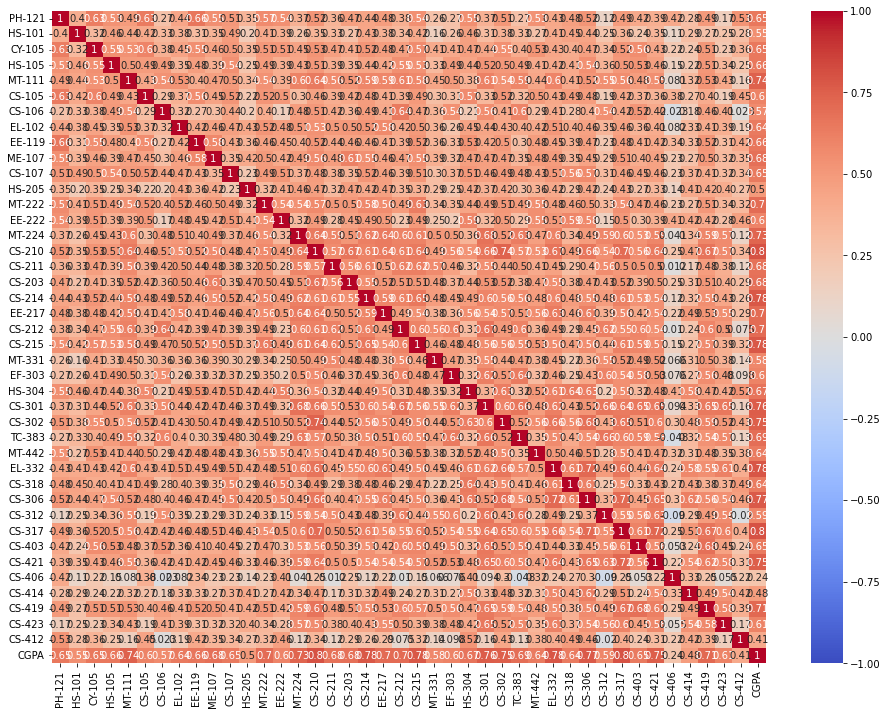

In [121]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(grade_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=grade_data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

# 6: Data Preprocessing

In [122]:
# Separating feature data and Label data
X = grade_data.drop(['CGPA'],axis=1)
y = grade_data['CGPA']

In [123]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((396, 41), (170, 41), (396,), (170,))

In [124]:
columns = grade_data.columns.to_list()
first_year, first_two_years,first_three_years = [],[],[]
for i in columns:
    if i[3] == '1': # to check if  the first X number is 1
        first_year.append(i)
        first_two_years.append(i)
        first_three_years.append(i)
    elif i[3] == '2': # to check if  the first X number is 2
        first_two_years.append(i)
        first_three_years.append(i) 
    elif i[3] == '3': # to check if  the first X number is 3
        first_three_years.append(i)
    first_four_years = list(X.columns)    

first_year, first_two_years, first_three_years,first_four_years
len(first_four_years),len(first_three_years),len(first_two_years),len(first_year)

(41, 33, 22, 11)

# 7.0 Predictive Modelling using various algorithms

# 7.1 Predicting for Year 1 using Linear Regression, 

In [125]:
grade_first_year =grade_data[first_year + ["CGPA"]] # Creating dataset for the first year
grade_first_year.head(5)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,CGPA
0,3.7,1.7,2.7,3.0,2.7,1.7,1.0,2.7,3.7,2.7,2.7,2.205
1,5.0,1.0,1.7,1.0,3.7,3.0,1.0,5.0,1.7,1.0,4.4,2.008
2,5.0,4.0,5.0,3.7,4.4,5.0,3.7,4.4,4.7,4.7,3.7,3.608
3,1.0,3.4,1.7,1.0,1.0,4.7,1.7,2.7,1.0,3.4,1.0,1.906
4,4.7,4.7,4.7,4.4,5.0,5.0,4.7,4.4,5.0,4.7,3.0,3.448


In [126]:
X_fy = grade_first_year.drop("CGPA", axis=1)
y_fy = grade_first_year[['CGPA']]
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(X_fy, y_fy, test_size=0.2, random_state=0)
X_train_first.shape,X_test_first.shape,y_train_first.shape,y_test_first.shape

((452, 11), (114, 11), (452, 1), (114, 1))

In [127]:
# Create linear regression object
fy_lr = LinearRegression()

fy_lr.fit(X_train_first, y_train_first)#build the model by training it with the training samples

# Make predictions using the testing set
YF_pred= fy_lr.predict(X_test_first)

In [128]:
YF_pred.shape

(114, 1)

In [129]:
grade_first_year.loc[5:10,'CGPA']

5     3.026
6     2.957
7     3.043
8     3.358
9     3.247
10    2.681
Name: CGPA, dtype: float64

In [130]:
#Accuracy and various Metrics for the model for first years
fy_lr_mae=mean_absolute_error(YF_pred,y_test_first)
fy_lr_r2=round(r2_score(y_test_first,YF_pred)*100,2)
print('Mean absolute error  =>',fy_lr_mae)
print('R2 Score  =>',fy_lr_r2)

Mean absolute error  => 0.1968953921559166
R2 Score  => 84.18


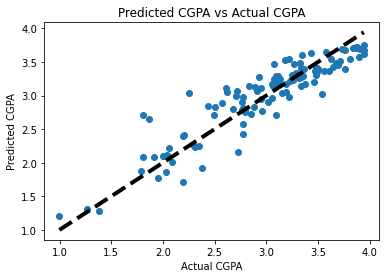

In [131]:
# Plot the predicted score against the actual score
plt.scatter(y_test_first, YF_pred)
plt.plot([y_test_first.min(), y_test_first.max()], [y_test_first.min(), y_test_first.max()], 'k--', lw=4)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Predicted CGPA vs Actual CGPA')
plt.show()

In [132]:
# Using Decison tree model
DT = DecisionTreeRegressor()
fy_DT = DT.fit(X_train_first, y_train_first)

In [133]:
fy_DT_pred=DT.predict(X_test_first) # Predicting the model
fy_DT_pred.shape

(114,)

In [134]:
#Accuracy and various Metrics for the model for first years
fy_dt_mae=mean_absolute_error(fy_DT_pred,y_test_first)
fy_dt_r2=round(r2_score(y_test_first,fy_DT_pred)*100,2)
print('Mean absolute error  =>',fy_dt_mae)
print('R2 Score  =>',fy_dt_r2)

Mean absolute error  => 0.27076315789473687
R2 Score  => 69.34


In [135]:
grade_first_year.loc[5:10,'CGPA']

5     3.026
6     2.957
7     3.043
8     3.358
9     3.247
10    2.681
Name: CGPA, dtype: float64

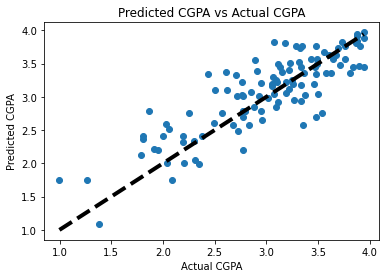

In [136]:
# Plot the predicted score against the actual score
plt.scatter(y_test_first, fy_DT_pred)
plt.plot([y_test_first.min(), y_test_first.max()], [y_test_first.min(), y_test_first.max()], 'k--', lw=4)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Predicted CGPA vs Actual CGPA')
plt.show()

In [137]:
# Using XGboost Model
# Simple model
xgbreg = XGBRegressor(random_state = 0)

In [138]:
# Fit the model
xgbreg.fit(X_train_first, y_train_first)

fy_xgb = xgbreg.predict(X_test_first)
fy_xgb.shape

(114,)

In [139]:
#Accuracy and various Metrics for the model for first years
fy_xgb_mae=mean_absolute_error(fy_xgb,y_test_first)
fy_xgb_r2=round(r2_score(y_test_first,fy_xgb)*100,2)
print('Mean absolute error  =>',fy_xgb_mae)
print('R2 Score  =>',fy_xgb_r2)

Mean absolute error  => 0.20500612975839982
R2 Score  => 82.91


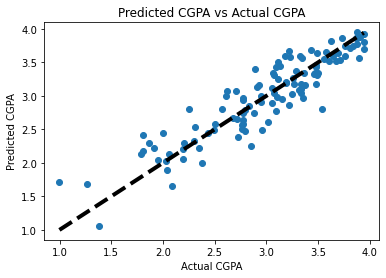

In [140]:
# Plot the predicted score against the actual score
plt.scatter(y_test_first, fy_xgb)
plt.plot([y_test_first.min(), y_test_first.max()], [y_test_first.min(), y_test_first.max()], 'k--', lw=4)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Predicted CGPA vs Actual CGPA')
plt.show()

7.2 Predicting for Year 1 and 2 using Linear, XGboost and Decison Tree Regressor

In [141]:
grade_first2_year =grade_data[first_two_years + ["CGPA"]] # Creating dataset for the first year
grade_first2_year.head(5)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,3.7,1.7,2.7,3.0,2.7,1.7,1.0,2.7,3.7,2.7,...,4.7,3.7,3.4,1.7,1.7,1.0,5.0,1.0,2.7,2.205
1,5.0,1.0,1.7,1.0,3.7,3.0,1.0,5.0,1.7,1.0,...,2.7,1.7,1.7,1.0,3.0,1.0,3.7,3.0,1.0,2.008
2,5.0,4.0,5.0,3.7,4.4,5.0,3.7,4.4,4.7,4.7,...,5.0,5.0,5.0,5.0,5.0,4.7,5.0,4.7,5.0,3.608
3,1.0,3.4,1.7,1.0,1.0,4.7,1.7,2.7,1.0,3.4,...,3.7,1.0,3.0,4.4,3.4,1.0,1.7,1.0,1.0,1.906
4,4.7,4.7,4.7,4.4,5.0,5.0,4.7,4.4,5.0,4.7,...,4.7,4.7,4.7,3.7,5.0,4.7,5.0,4.7,4.7,3.448


In [142]:
X_f2y = grade_first2_year.drop("CGPA", axis=1)
y_f2y = grade_first2_year[['CGPA']]
X_train_first2, X_test_first2, y_train_first2, y_test_first2 = train_test_split(X_f2y, y_f2y, test_size=0.2, random_state=0)
X_train_first2.shape,X_test_first2.shape,y_train_first2.shape,y_test_first2.shape

((452, 22), (114, 22), (452, 1), (114, 1))

In [143]:
# Create linear regression object
f2y_lr = LinearRegression()

f2y_lr.fit(X_train_first2, y_train_first2)#build the model by training it with the training samples

# Make predictions using the testing set
YF2_pred= f2y_lr.predict(X_test_first2)

In [144]:
YF2_pred.shape

(114, 1)

In [145]:
#Accuracy and various Metrics for the model for first years
f2y_lr_mae=mean_absolute_error(YF2_pred,y_test_first2)
f2y_lr_r2=round(r2_score(y_test_first2,YF2_pred)*100,2)
print('Mean absolute error  =>',f2y_lr_mae)
print('R2 Score  =>',f2y_lr_r2)

Mean absolute error  => 0.12595212127184519
R2 Score  => 92.63


In [146]:
# using Decision tree Regressor
# Using Decison tree model
DT = DecisionTreeRegressor()
f2y_DT = DT.fit(X_train_first2, y_train_first2)

In [147]:
f2y_DT_pred=DT.predict(X_test_first2) # Predicting the model
f2y_DT_pred.shape

(114,)

In [148]:
#Accuracy and various Metrics for the model for first years
f2y_dt_mae=mean_absolute_error(f2y_DT_pred,y_test_first2)
f2y_dt_r2=round(r2_score(y_test_first2,f2y_DT_pred)*100,2)
print('Mean absolute error  =>',f2y_dt_mae)
print('R2 Score  =>',f2y_dt_r2)

Mean absolute error  => 0.186859649122807
R2 Score  => 85.78


In [149]:
# Using XGboost Model
# Simple model
xgbreg = XGBRegressor(random_state = 0)

In [150]:
# Fit the model
xgbreg.fit(X_train_first2, y_train_first2)

f2y_xgb = xgbreg.predict(X_test_first2)
f2y_xgb.shape

(114,)

In [151]:
#Accuracy and various Metrics for the model for first years
f2y_xgb_mae=mean_absolute_error(f2y_xgb,y_test_first2)
f2y_xgb_r2=round(r2_score(y_test_first2,f2y_xgb)*100,2)
print('Mean absolute error  =>',f2y_xgb_mae)
print('R2 Score  =>',f2y_xgb_r2)

Mean absolute error  => 0.1337060089864229
R2 Score  => 91.99


7.3 Predicting for Year 1, 2 and 3 using Linear, XGboost and Decison Tree Regressor

In [152]:
grade_first3_year =grade_data[first_three_years + ["CGPA"]] # Creating dataset for the first year
grade_first3_year.head(5)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317,CGPA
0,3.7,1.7,2.7,3.0,2.7,1.7,1.0,2.7,3.7,2.7,...,3.4,4.0,3.0,3.4,3.0,2.7,3.0,2.7,2.7,2.205
1,5.0,1.0,1.7,1.0,3.7,3.0,1.0,5.0,1.7,1.0,...,2.7,4.7,1.7,2.7,3.0,4.7,1.0,1.7,1.0,2.008
2,5.0,4.0,5.0,3.7,4.4,5.0,3.7,4.4,4.7,4.7,...,5.0,4.4,4.7,4.0,4.4,4.7,4.7,4.0,4.0,3.608
3,1.0,3.4,1.7,1.0,1.0,4.7,1.7,2.7,1.0,3.4,...,3.7,1.0,3.7,1.7,1.7,4.4,2.7,1.7,3.0,1.906
4,4.7,4.7,4.7,4.4,5.0,5.0,4.7,4.4,5.0,4.7,...,4.7,3.7,4.7,3.4,4.7,3.7,4.7,3.7,4.4,3.448


In [153]:
X_f3y = grade_first3_year.drop("CGPA", axis=1)
y_f3y = grade_first3_year[['CGPA']]
X_train_first3, X_test_first3, y_train_first3, y_test_first3 = train_test_split(X_f3y, y_f3y, test_size=0.2, random_state=0)
X_train_first3.shape,X_test_first3.shape,y_train_first3.shape,y_test_first3.shape

((452, 33), (114, 33), (452, 1), (114, 1))

In [154]:
# Create linear regression object
f3y_lr = LinearRegression()

f3y_lr.fit(X_train_first3, y_train_first3)#build the model by training it with the training samples

# Make predictions using the testing set
YF3_pred= f3y_lr.predict(X_test_first3)

In [155]:
#Accuracy and various Metrics for the model for first years
f3y_lr_mae=mean_absolute_error(YF3_pred,y_test_first3)
f3y_lr_r2=round(r2_score(y_test_first3,YF3_pred)*100,2)
print('Mean absolute error  =>',f3y_lr_mae)
print('R2 Score  =>',f3y_lr_r2)

Mean absolute error  => 0.08717422932257597
R2 Score  => 95.86


In [156]:
# using Decision tree Regressor
# Using Decison tree model
DT = DecisionTreeRegressor()
f3y_DT = DT.fit(X_train_first3, y_train_first3)

In [157]:
f3y_DT_pred=DT.predict(X_test_first3) # Predicting the model
f3y_DT_pred.shape

(114,)

In [158]:
#Accuracy and various Metrics for the model for first years
f3y_dt_mae=mean_absolute_error(f3y_DT_pred,y_test_first3)
f3y_dt_r2=round(r2_score(y_test_first3,f3y_DT_pred)*100,2)
print('Mean absolute error  =>',f3y_dt_mae)
print('R2 Score  =>',f3y_dt_r2)

Mean absolute error  => 0.15642105263157896
R2 Score  => 87.86


In [159]:
# Using XGboost Model
# Simple model
xgbreg = XGBRegressor(random_state = 0)

In [160]:
# Fit the model
xgbreg.fit(X_train_first3, y_train_first3)

f3y_xgb = xgbreg.predict(X_test_first3)
f3y_xgb.shape

(114,)

In [161]:
#Accuracy and various Metrics for the model for first years
f3y_xgb_mae=mean_absolute_error(f3y_xgb,y_test_first3)
f3y_xgb_r2=round(r2_score(y_test_first3,f3y_xgb)*100,2)
print('Mean absolute error  =>',f3y_xgb_mae)
print('R2 Score  =>',f3y_xgb_r2)

Mean absolute error  => 0.13391470542706943
R2 Score  => 91.29


7.4 Predicting for Year 1, 2 3 and 4 using Linear, XGboost and Decison Tree Regressor

In [162]:
grade_first4_year =grade_data[first_four_years + ["CGPA"]] # Creating dataset for the first year
grade_first4_year.head(5)


,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,3.7,1.7,2.7,3.0,2.7,1.7,1.0,2.7,3.7,2.7,...,2.7,2.7,2.7,2.7,4.7,5.0,2.7,4.0,4.7,2.205
1,5.0,1.0,1.7,1.0,3.7,3.0,1.0,5.0,1.7,1.0,...,1.7,1.0,3.0,1.0,4.7,3.7,3.0,3.0,4.0,2.008
2,5.0,4.0,5.0,3.7,4.4,5.0,3.7,4.4,4.7,4.7,...,4.0,4.0,5.0,3.0,5.0,5.0,5.0,4.7,5.0,3.608
3,1.0,3.4,1.7,1.0,1.0,4.7,1.7,2.7,1.0,3.4,...,1.7,3.0,1.7,2.7,3.7,4.0,3.4,3.4,3.4,1.906
4,4.7,4.7,4.7,4.4,5.0,5.0,4.7,4.4,5.0,4.7,...,3.7,4.4,4.4,3.7,4.7,5.0,4.7,4.7,5.0,3.448


In [163]:
X_f4y = grade_first4_year.drop("CGPA", axis=1)
y_f4y = grade_first4_year[['CGPA']]
X_train_first4, X_test_first4, y_train_first4, y_test_first4 = train_test_split(X_f4y, y_f4y, test_size=0.2, random_state=0)
X_train_first4.shape,X_test_first4.shape,y_train_first4.shape,y_test_first4.shape

((452, 41), (114, 41), (452, 1), (114, 1))

In [164]:
# Create linear regression object
f4y_lr = LinearRegression()

f4y_lr.fit(X_train_first4, y_train_first4)#build the model by training it with the training samples

# Make predictions using the testing set
YF4_pred= f4y_lr.predict(X_test_first4)

In [165]:
#Accuracy and various Metrics for the model for first years
f4y_lr_mae=mean_absolute_error(YF4_pred,y_test_first4)
f4y_lr_r2=round(r2_score(y_test_first4,YF4_pred)*100,2)
print('Mean absolute error  =>',f4y_lr_mae)
print('R2 Score  =>',f4y_lr_r2)

Mean absolute error  => 0.08340842114413591
R2 Score  => 96.41


In [166]:
# using Decision tree Regressor
# Using Decison tree model
DT = DecisionTreeRegressor()
f34_DT = DT.fit(X_train_first4, y_train_first4)

In [167]:
f4y_DT_pred=DT.predict(X_test_first4) # Predicting the model
f4y_DT_pred.shape

(114,)

In [168]:
#Accuracy and various Metrics for the model for first years
f4y_dt_mae=mean_absolute_error(f4y_DT_pred,y_test_first4)
f4y_dt_r2=round(r2_score(y_test_first4,f4y_DT_pred)*100,2)
print('Mean absolute error  =>',f4y_dt_mae)
print('R2 Score  =>',f4y_dt_r2)

Mean absolute error  => 0.1707982456140351
R2 Score  => 87.57


In [169]:
# Using XGboost Model
# Simple model
xgbreg = XGBRegressor(random_state = 0)

In [170]:
# Fit the model
xgbreg.fit(X_train_first4, y_train_first4)

f4y_xgb = xgbreg.predict(X_test_first4)
f4y_xgb.shape

(114,)

In [171]:
#Accuracy and various Metrics for the model for first years
f4y_xgb_mae=mean_absolute_error(f4y_xgb,y_test_first4)
f4y_xgb_r2=round(r2_score(y_test_first4,f4y_xgb)*100,2)
print('Mean absolute error  =>',f4y_xgb_mae)
print('R2 Score  =>',f4y_xgb_r2)

Mean absolute error  => 0.11528652294895105
R2 Score  => 93.07


# 8: Comparing the models and Model Evaluation

In [172]:
# Results for first years
fy_models_metrics = pd.DataFrame([
    ["Linear Regression", fy_lr_r2, fy_lr_mae],
    ["Decision Tree Regressor",fy_dt_r2, fy_dt_mae],
    ["Gradientboost Classifier Modelsr",fy_xgb_r2, fy_xgb_mae]
])
fy_models_metrics.columns= ["Model Accuracy for first year","Accuracy","MSE"]
#fy_models_metrics.set_index("Model Accuracy for first years")
fy_models_metrics

,Model Accuracy for first year,Accuracy,MSE
0,Linear Regression,84.18,0.196895
1,Decision Tree Regressor,69.34,0.270763
2,Gradientboost Classifier Modelsr,82.91,0.205006


In [173]:
# Results for Second years
f2y_models_metrics = pd.DataFrame([
    ["Linear Regression", f2y_lr_r2, f2y_lr_mae],
    ["Decision Tree Regressor",f2y_dt_r2, f2y_dt_mae],
    ["Gradientboost Classifier Modelsr",f2y_xgb_r2, f2y_xgb_mae]
])
f2y_models_metrics.columns= ["Model Accuracy for Second Year","Accuracy","MSE"]
#f2y_models_metrics.set_index("Model Accuracy for Second years")
f2y_models_metrics

,Model Accuracy for Second Year,Accuracy,MSE
0,Linear Regression,92.63,0.125952
1,Decision Tree Regressor,85.78,0.186860
2,Gradientboost Classifier Modelsr,91.99,0.133706


In [174]:
# Results for Third years
f3y_models_metrics = pd.DataFrame([
    ["Linear Regression", f3y_lr_r2, f3y_lr_mae],
    ["Decision Tree Regressor",f3y_dt_r2, f3y_dt_mae],
    ["Gradientboost Classifier Modelsr",f3y_xgb_r2, f3y_xgb_mae]
])
f3y_models_metrics.columns= ["Model Accuracy for Third Year","Accuracy","MSE"]
#f2y_models_metrics.set_index("Model Accuracy for Second years")
f3y_models_metrics

,Model Accuracy for Third Year,Accuracy,MSE
0,Linear Regression,95.86,0.087174
1,Decision Tree Regressor,87.86,0.156421
2,Gradientboost Classifier Modelsr,91.29,0.133915


In [175]:
# Results for Third years
f4y_models_metrics = pd.DataFrame([
    ["Linear Regression", f4y_lr_r2, f4y_lr_mae],
    ["Decision Tree Regressor",f4y_dt_r2, f4y_dt_mae],
    ["Gradientboost Classifier Modelsr",f4y_xgb_r2, f4y_xgb_mae]
])
f4y_models_metrics.columns= ["Model Accuracy for fourth Year","Accuracy","MSE"]
#f2y_models_metrics.set_index("Model Accuracy for Second years")
f4y_models_metrics

,Model Accuracy for fourth Year,Accuracy,MSE
0,Linear Regression,96.41,0.083408
1,Decision Tree Regressor,87.57,0.170798
2,Gradientboost Classifier Modelsr,93.07,0.115287


In [176]:
X_test_first4.head(5)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
479,4.4,1.0,5.0,4.4,4.0,5.0,4.7,4.4,4.7,4.4,...,1.7,4.0,3.7,5.0,3.7,4.0,3.7,4.7,3.0,3.4
215,4.7,4.4,5.0,5.0,4.7,4.7,5.0,4.4,3.4,5.0,...,4.4,2.7,3.7,2.7,3.0,4.7,4.0,3.0,3.4,4.7
135,4.7,1.7,4.7,1.7,4.0,5.0,3.0,4.7,4.7,5.0,...,3.7,1.7,3.4,1.7,1.7,4.0,4.7,3.4,3.4,3.7
109,3.4,1.7,3.4,2.7,2.7,3.7,2.7,1.7,4.4,3.4,...,3.4,3.0,2.7,3.0,2.7,4.7,4.7,3.7,1.7,3.7
104,5.0,1.7,5.0,3.4,5.0,4.7,4.4,5.0,4.7,5.0,...,4.7,4.0,5.0,4.7,4.7,5.0,5.0,5.0,5.0,5.0


In [177]:
#grade_data.loc[5:10,'Seat No.']

## Let us make prediction based on decsion tree
test_pred =xgbreg.predict(X_test_first4)
test_pred


array([3.168231 , 3.0873976, 2.877987 , 2.6362314, 3.7138786, 3.1550887,
       3.5677996, 2.9833546, 3.2419293, 2.9300485, 2.074093 , 3.2905865,
       2.8610284, 3.5068314, 3.218617 , 2.002199 , 3.4116826, 2.9394076,
       2.5388587, 2.0619512, 3.730503 , 3.032747 , 3.5441256, 3.289095 ,
       3.7370744, 3.344831 , 3.955547 , 3.2034917, 3.117842 , 2.8933342,
       1.9202113, 3.8589633, 3.7952156, 2.8484087, 3.4331048, 1.8642017,
       3.4622595, 2.8194973, 2.7254815, 3.8517318, 3.244764 , 3.935402 ,
       2.7926126, 3.8804698, 3.5913112, 2.0894165, 2.9915018, 2.9149406,
       3.5670996, 2.562785 , 3.1734493, 3.7624974, 3.1317   , 2.7967868,
       3.46082  , 2.6783638, 2.6611538, 3.162825 , 2.7767982, 2.6632786,
       2.080818 , 3.3355443, 3.36037  , 2.7663517, 2.6154647, 2.0579653,
       3.8729904, 3.6624987, 3.956302 , 2.0569124, 2.9677708, 3.3221617,
       3.6184   , 2.0825775, 3.2134404, 3.0539553, 3.8303623, 3.2777975,
       2.308957 , 2.7629914, 2.5435264, 3.1883678, 

In [181]:
Studentid[2:100]

2     CS-97003
3     CS-97004
4     CS-97005
5     CS-97006
6     CS-97007
        ...   
95    CS-97096
96    CS-97097
97    CS-97098
98    CS-97099
99    CS-97100
Name: Seat No., Length: 98, dtype: object

In [182]:
# We are going to use the prediction of extra tree classifier since it is the one with the best accuracy
#list_of_features = features
#output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': clf_pred})
output=pd.DataFrame({'PassengerId': Studentid[2:100], 'CGPA':test_pred[2:100]})
output.to_csv('cgpa.csv', index=False)

In [183]:
# Loading the dataset downloaded from kaggle
output_dt=pd.read_csv('cgpa.csv')
output_dt.tail(15)

,PassengerId,CGPA
83,CS-97086,3.919070
84,CS-97087,3.490704
85,CS-97088,2.681825
86,CS-97089,1.123951
87,CS-97090,1.845192
88,CS-97091,3.050237
89,CS-97092,3.137291
90,CS-97093,2.095371
91,CS-97094,2.240740
92,CS-97095,2.618027
